In [9]:
import numpy as np
import sys
from sklearn.metrics import confusion_matrix, classification_report
from pointcloud import PointCloud
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import test_plot

from train import split_data, train_svm_linear, train_svm_rbf, train_svm_poly

## Build dataset and split in train and test

In [2]:
labels = ["building", "car", "fence", "pole", "tree"]
labels_dataset = []
features_dataset = []
for hundred in range(5):
    class_name = labels[hundred]
    print(f"Processing {class_name}")
    for i in range(100): #todo 100
        if i % 10 == 0:
            print(f"Processing {class_name}: {i}")
        point_cloud = PointCloud.from_file(f"data/pointclouds/{hundred}{i:02d}.xyz")
        features = point_cloud.compute_feature_matrix()
        labels_dataset.append(class_name)
        features_dataset.append(features)

train_features, test_features, train_labels, test_labels = split_data(features_dataset, labels_dataset)

Processing building
Processing 0
Processing 1
Processing 2
Processing 3
Processing 4
Processing 5
Processing 6
Processing 7
Processing 8
Processing 9
Processing 10
Processing 11
Processing 12
Processing 13
Processing 14
Processing 15
Processing 16
Processing 17
Processing 18
Processing 19
Processing 20
Processing 21
Processing 22
Processing 23
Processing 24
Processing 25
Processing 26
Processing 27
Processing 28
Processing 29
Processing 30
Processing 31
Processing 32
Processing 33
Processing 34
Processing 35
Processing 36
Processing 37
Processing 38
Processing 39
Processing 40
Processing 41
Processing 42
Processing 43
Processing 44
Processing 45
Processing 46
Processing 47
Processing 48
Processing 49
Processing 50
Processing 51
Processing 52
Processing 53
Processing 54
Processing 55
Processing 56
Processing 57
Processing 58
Processing 59
Processing 60
Processing 61
Processing 62
Processing 63
Processing 64
Processing 65
Processing 66
Processing 67
Processing 68
Processing 69
Processing

## Train SVMs with different Kernels
The functions use grid search to find the best parameters for the SVMs.

In [3]:
svm_linear = train_svm_linear(train_features, train_labels)
svm_poly = train_svm_poly(train_features, train_labels)
svm_rbf = train_svm_rbf(train_features, train_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Found best parameters for poly kernel:
{'C': 10000000000, 'degree': 2, 'kernel': 'poly'}
Fitting 5 folds for each of 169 candidates, totalling 845 fits
Best hyperparameters found by grid search:
{'C': 10000000, 'gamma': 1e-07, 'kernel': 'rbf'}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .......................C=0.1, degree=4, kernel=poly; total time=   0.0s
[CV] END ........................C=10, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=100, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=100, degree=5, kernel=poly; total time=   0.0s
[CV] END ......................C=1000, degree=5, kernel=poly; total time=   0.0s
[CV] END ......................C=1000, degree=5, kernel=poly; total time=   0.0s
[CV] END .....................C=10000, degree=4, kernel=poly; total time=   0.0s
[CV] END .....................C=10000, degree=5, kernel=poly; tot

## Print results of SVMs

In [5]:
y_pred_linear = svm_linear.predict(test_features)
print("Linear Kernel:")
print(confusion_matrix(test_labels, y_pred_linear))
print(classification_report(test_labels, y_pred_linear))

# Polynomial kernel
y_pred_poly = svm_poly.predict(test_features)
print("Polynomial Kernel:")
print(confusion_matrix(test_labels, y_pred_poly))
print(classification_report(test_labels, y_pred_poly))

y_pred_rbf = svm_rbf.predict(test_features)
print("RBF Kernel:")
print(confusion_matrix(test_labels, y_pred_rbf))
print(classification_report(test_labels, y_pred_rbf))


Linear Kernel:
[[27  0  0  0  1]
 [ 0 14  0  0  0]
 [ 0  0 10  0  0]
 [ 0  1  0 22  1]
 [ 1  0  0  0 23]]
              precision    recall  f1-score   support

    building       0.96      0.96      0.96        28
         car       0.93      1.00      0.97        14
       fence       1.00      1.00      1.00        10
        pole       1.00      0.92      0.96        24
        tree       0.92      0.96      0.94        24

    accuracy                           0.96       100
   macro avg       0.96      0.97      0.97       100
weighted avg       0.96      0.96      0.96       100

Polynomial Kernel:
[[28  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 10  0  0]
 [ 0  1  0 23  0]
 [ 1  0  0  0 23]]
              precision    recall  f1-score   support

    building       0.97      1.00      0.98        28
         car       0.93      1.00      0.97        14
       fence       1.00      1.00      1.00        10
        pole       1.00      0.96      0.98        24
        tree       1.00 

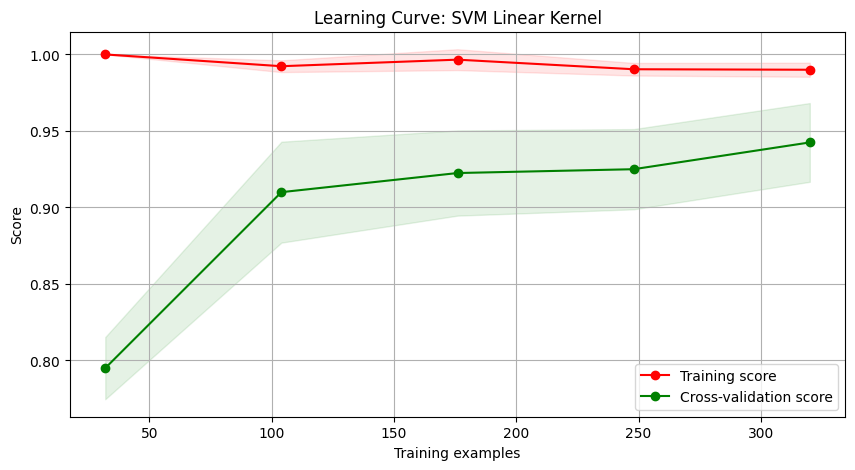

In [11]:
cv = 5
train_sizes = np.linspace(0.1, 1.0, 5, 10)
title = "Learning Curve: SVM Linear Kernel"
test_plot.plot_learning_curve(svm_linear, title, train_features, train_labels, cv=cv, n_jobs=4, train_sizes=train_sizes)
plt.show()

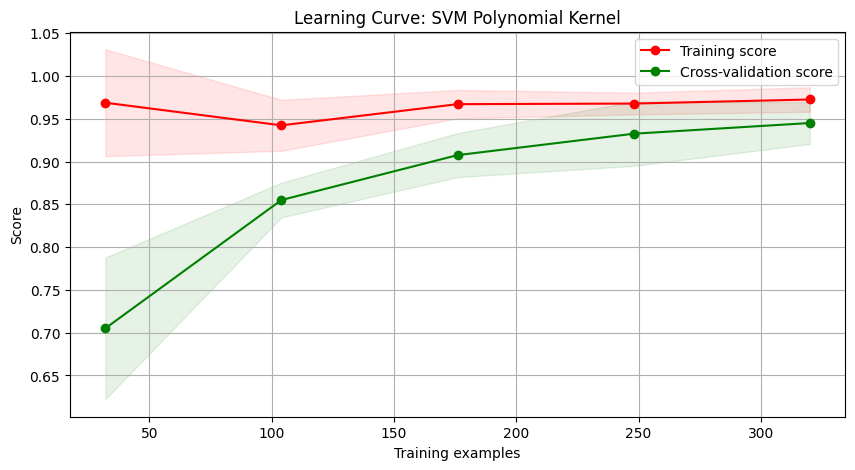

In [12]:
title = "Learning Curve: SVM Polynomial Kernel"
test_plot.plot_learning_curve(svm_poly, title, train_features, train_labels, cv=cv, n_jobs=4, train_sizes=train_sizes)
plt.show()

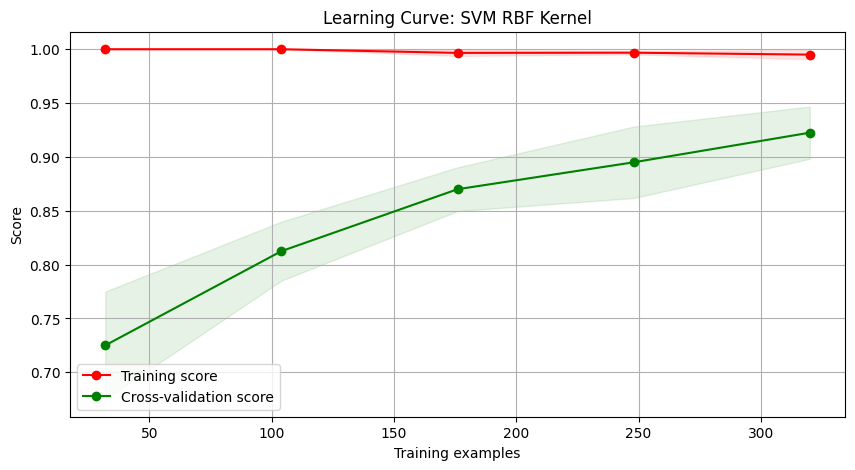

In [13]:
title = "Learning Curve: SVM RBF Kernel"
test_plot.plot_learning_curve(svm_rbf, title, train_features, train_labels, cv=cv, n_jobs=4, train_sizes=train_sizes)
plt.show()